# Waterloo Exploration Database: New Challenges for Image Quality Assessment Models

https://ece.uwaterloo.ca/~k29ma/exploration/

In [15]:
# import liberies
import os 
import glob

import numpy as np
import matplotlib.pyplot as plt

import cv2 

# import external liberaries
import importlib
import data_utils
importlib.reload(data_utils)
from data_utils import show_images_grid, add_gaussian_noise, add_poisson_noise, forward_projection

In [2]:
# 
data_root = "./data/exploration_database_and_code/pristine_images/"

bmp_files = glob.glob(data_root + "*.bmp")
filesname = [os.path.basename(x) for x in bmp_files]

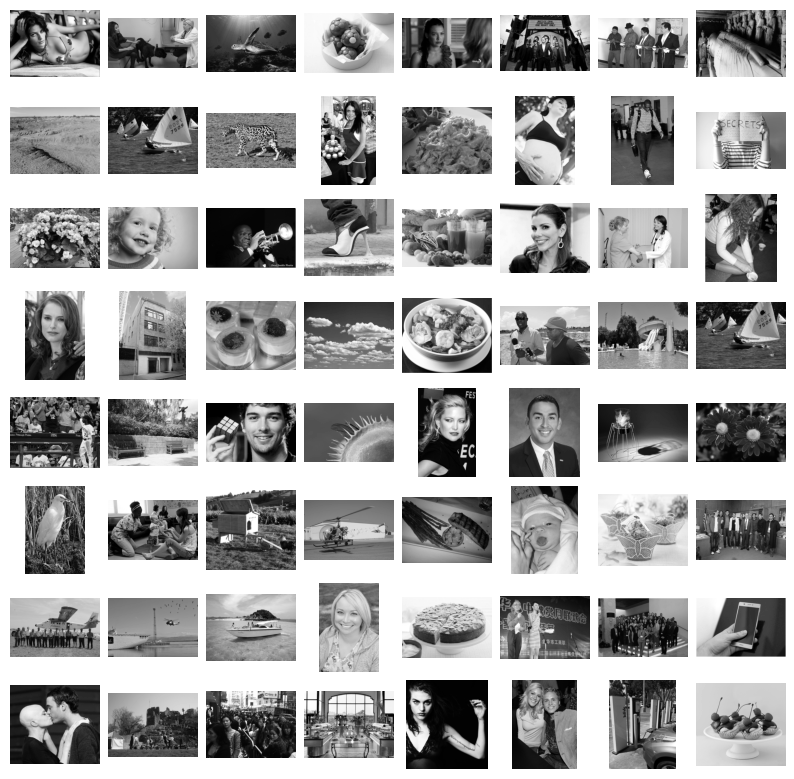

In [3]:
# read images as grayscale
num_images = 64

images = [cv2.imread(x, 0) for x in np.random.choice(bmp_files, num_images)]

# show exampe images
show_images_grid(images, cmap='gray')

## show different poisson noisy images

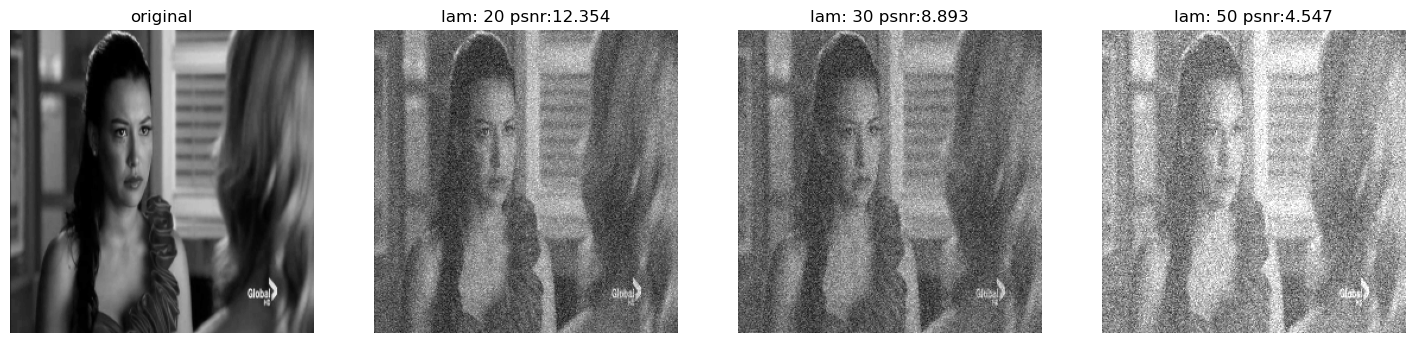

In [23]:
image = cv2.resize(images[4], (256, 256))

lams = [20, 30, 50]
noisy_images = [add_poisson_noise(image, lam=lam, scale=3)[0] for lam in lams]

fig, axs = plt.subplots(1, 4, figsize=(18, 10))
for i, ax in enumerate(axs):
    if i == 0:
        ax.imshow(image, cmap='gray')
        ax.set_title('original')
    else:
        psnr = cv2.PSNR(image, noisy_images[i-1])
        ax.imshow(noisy_images[i-1], cmap='gray')
        ax.set_title(f'lam: {lams[i-1]} psnr:{psnr:.3f}')
    ax.axis('off')
    

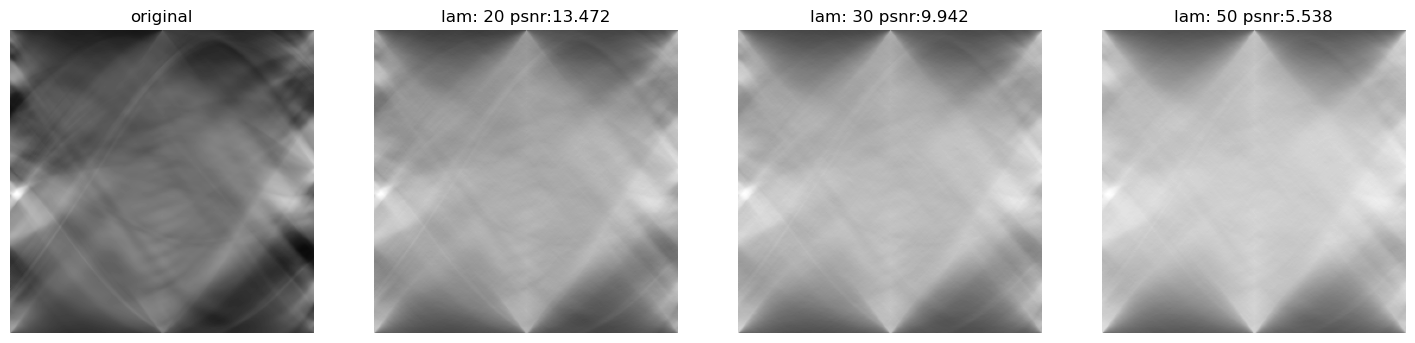

In [24]:
sinogram = forward_projection(image)

noisy_sinograms = [forward_projection(noisy_image) for noisy_image in noisy_images]

fig, axs = plt.subplots(1, 4, figsize=(18, 10))
for i, ax in enumerate(axs):
    if i == 0:
        ax.imshow(sinogram, cmap='gray')
        ax.set_title('original')
    else:
        psnr = cv2.PSNR(sinogram, noisy_sinograms[i-1])
        ax.imshow(noisy_sinograms[i-1], cmap='gray')
        ax.set_title(f'lam: {lams[i-1]} psnr:{psnr:.3f}')
    ax.axis('off')


## show different gaussian noisy images

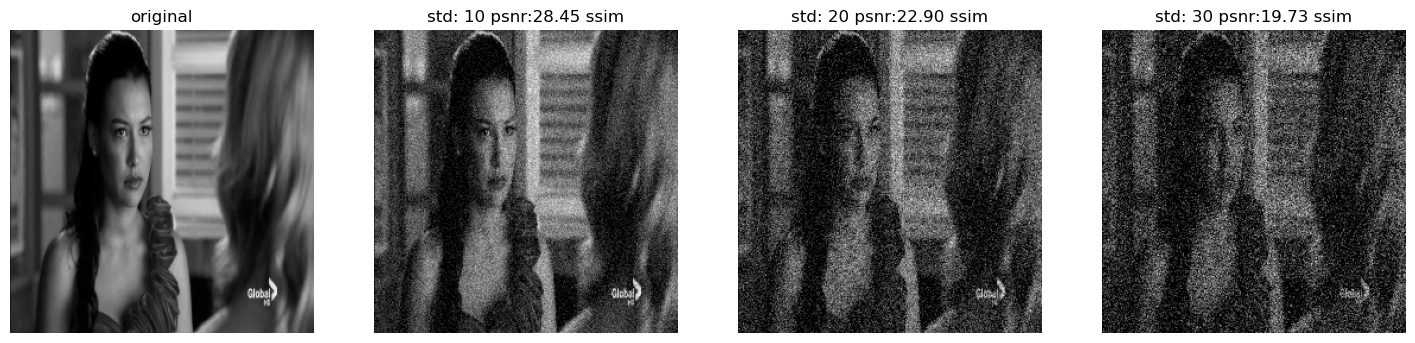

In [12]:
stds = [10, 20, 30]
noisy_images = [add_gaussian_noise(image, std_dev=std)[0] for std in stds]

fig, axs = plt.subplots(1, 4, figsize=(18, 10))
for i, ax in enumerate(axs):
    if i == 0:
        ax.imshow(image, cmap='gray')
        ax.set_title('original')
    else:
        psnr = cv2.PSNR(image, noisy_images[i-1])
        ax.imshow(noisy_images[i-1], cmap='gray')
        ax.set_title(f'std: {stds[i-1]} psnr:{psnr:.2f} ssim')
    ax.axis('off')